In [ ]:
from google.colab import files
uploaded = files.upload()

Saving treatments.csv to treatments.csv
Saving patients.csv to patients.csv
Saving doctors.csv to doctors.csv
Saving billing.csv to billing.csv
Saving appointments.csv to appointments.csv


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from datetime import datetime
sns.set(style="whitegrid")
# Load data
patients = pd.read_csv('patients.csv')
doctors = pd.read_csv('doctors.csv')
appointments = pd.read_csv('appointments.csv')
treatments = pd.read_csv('treatments.csv')
billing = pd.read_csv('billing.csv')

We will start our project with some EDA to understand our data and see if we have any missing values or other cleaning operations that needs to take place.

----- PATIENTS -----
Shape: (50, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   patient_id          50 non-null     object
 1   first_name          50 non-null     object
 2   last_name           50 non-null     object
 3   gender              50 non-null     object
 4   date_of_birth       50 non-null     object
 5   contact_number      50 non-null     int64 
 6   address             50 non-null     object
 7   registration_date   50 non-null     object
 8   insurance_provider  50 non-null     object
 9   insurance_number    50 non-null     object
 10  email               50 non-null     object
dtypes: int64(1), object(10)
memory usage: 4.4+ KB
None
       patient_id first_name last_name gender date_of_birth  contact_number  \
count          50         50        50     50            50    5.000000e+01   
unique         50     

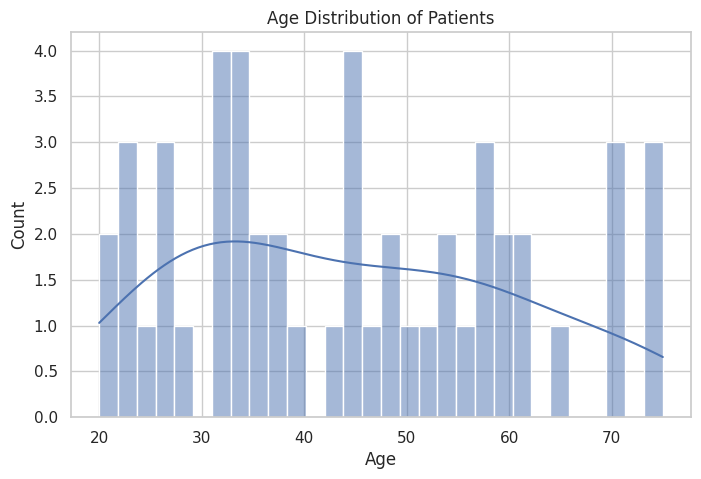


Top Insurance Providers:
insurance_provider
MedCare Plus    18
WellnessCorp    16
PulseSecure     10
HealthIndia      6
Name: count, dtype: int64


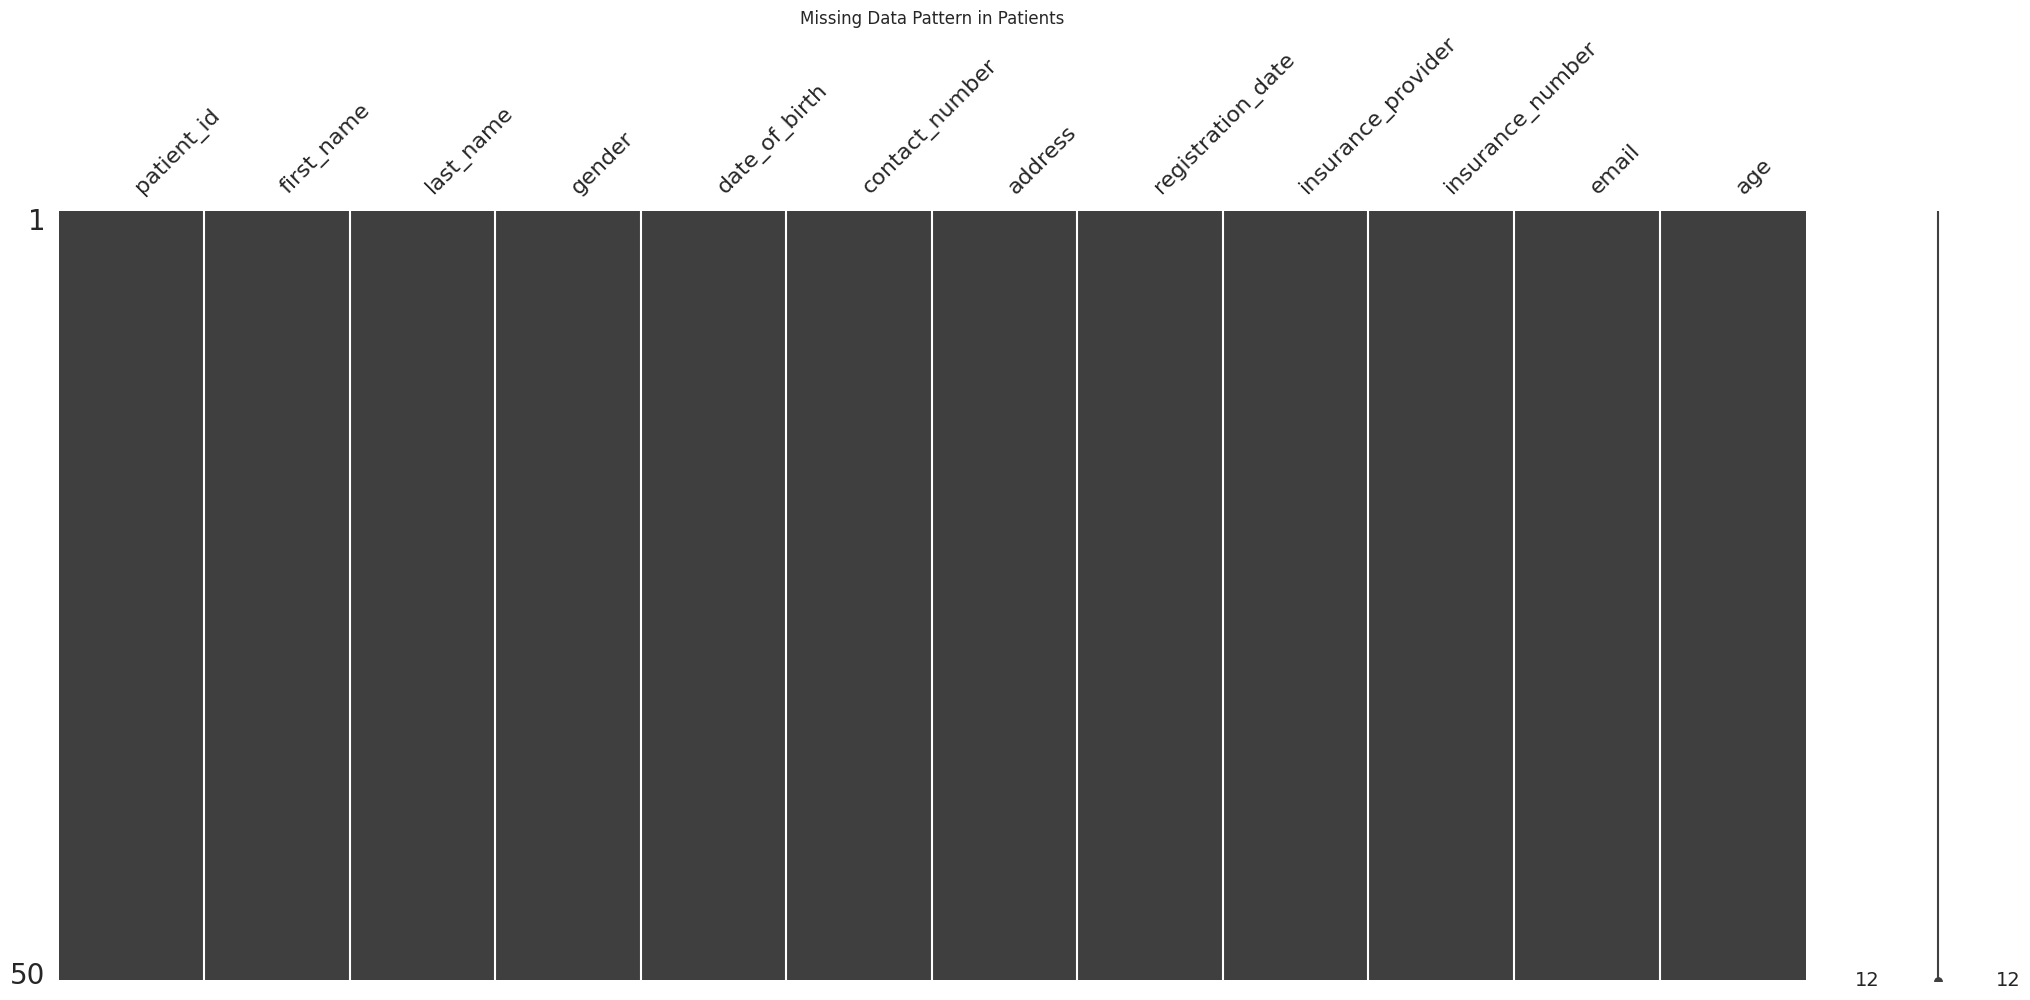

In [ ]:
# ----------- PATIENTS -----------
print("----- PATIENTS -----")
print(f"Shape: {patients.shape}")
print(patients.info())
print(patients.describe(include='all'))

# Check unique patients
print(f"Unique patient IDs: {patients['patient_id'].nunique()}")

# Gender distribution
print("\nGender Distribution:")
print(patients['gender'].value_counts())

# Age distribution (calculate from DOB)
patients['date_of_birth'] = pd.to_datetime(patients['date_of_birth'], errors='coerce')
today = pd.to_datetime('today')
patients['age'] = (today - patients['date_of_birth']).dt.days // 365

plt.figure(figsize=(8,5))
sns.histplot(patients['age'].dropna(), bins=30, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Insurance provider distribution
print("\nTop Insurance Providers:")
print(patients['insurance_provider'].value_counts().head(10))

# Missing data visualization
msno.matrix(patients)
plt.title("Missing Data Pattern in Patients")
plt.show()


----- DOCTORS -----
Shape: (10, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   doctor_id         10 non-null     object
 1   first_name        10 non-null     object
 2   last_name         10 non-null     object
 3   specialization    10 non-null     object
 4   phone_number      10 non-null     int64 
 5   years_experience  10 non-null     int64 
 6   hospital_branch   10 non-null     object
 7   email             10 non-null     object
dtypes: int64(2), object(6)
memory usage: 772.0+ bytes
None
       doctor_id first_name last_name specialization  phone_number  \
count         10         10        10             10  1.000000e+01   
unique        10          6         6              3           NaN   
top         D001      David     Davis     Pediatrics           NaN   
freq           1          2         3              5           

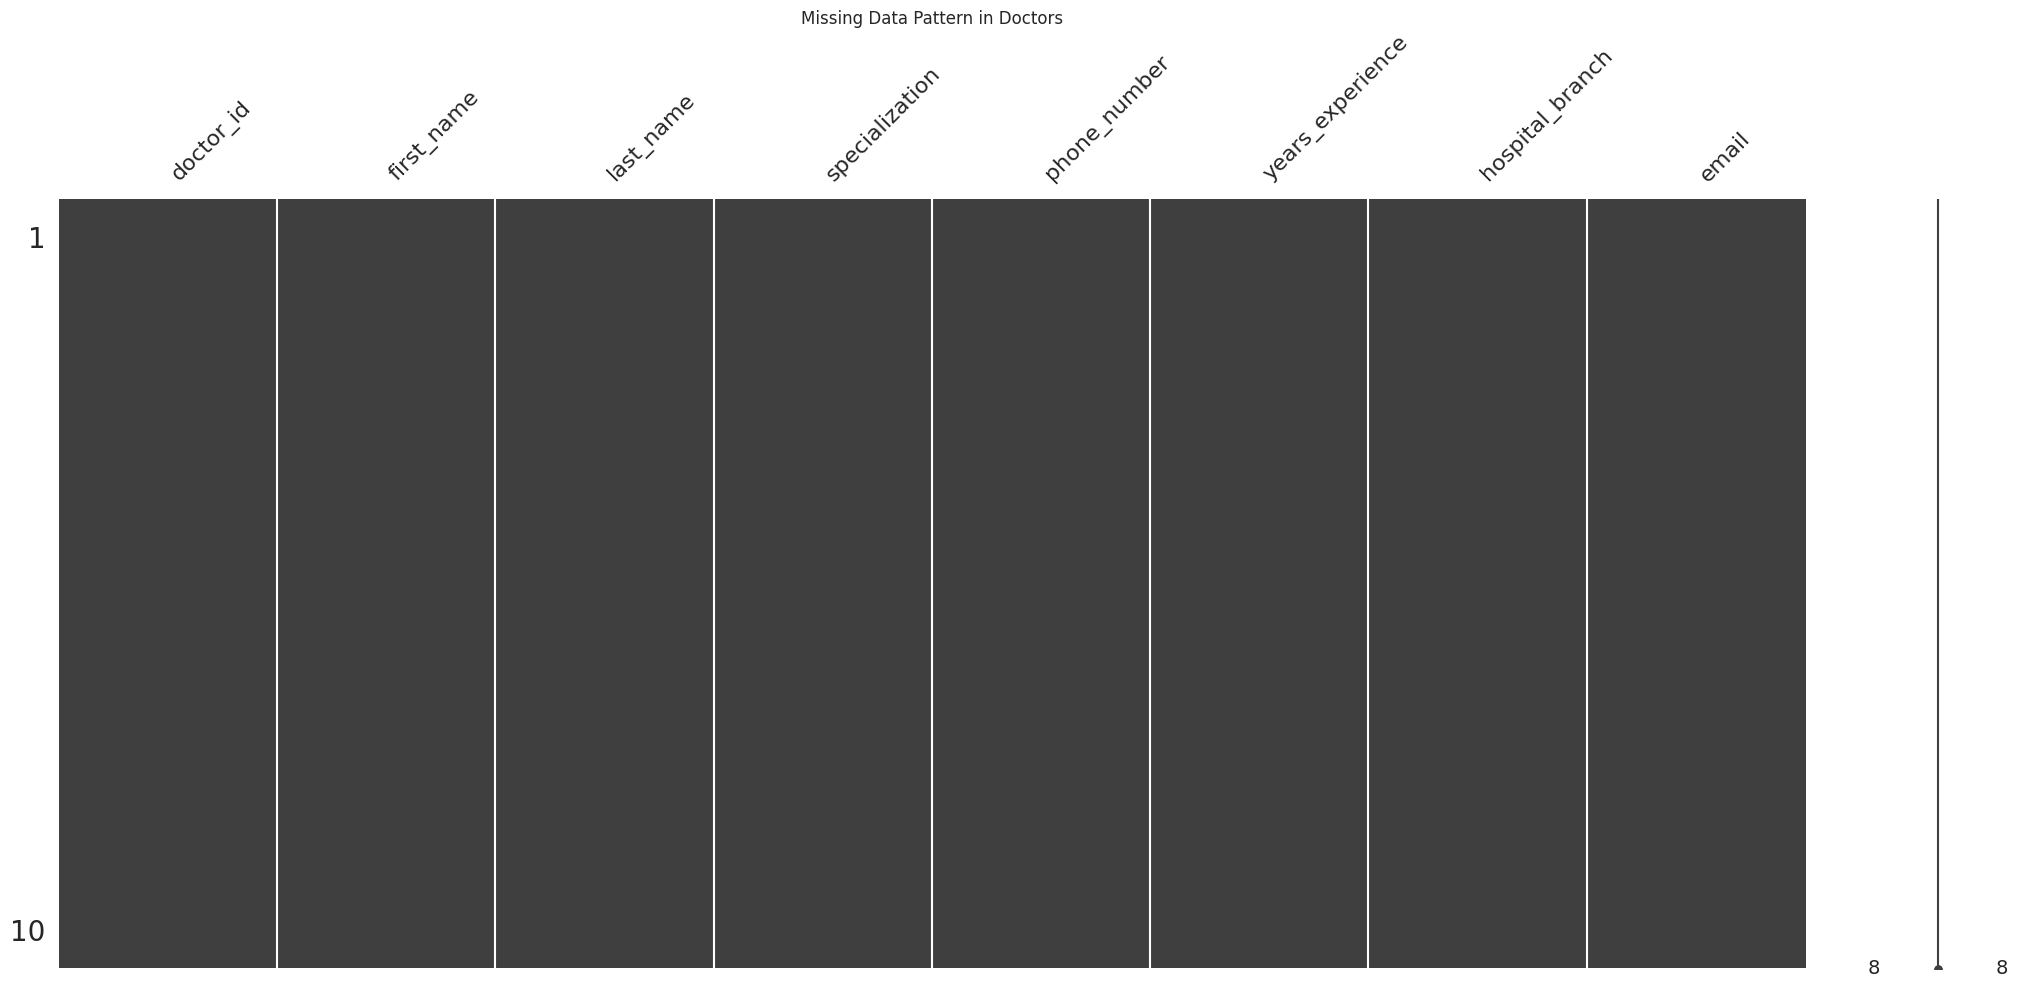

In [ ]:
print("\n----- DOCTORS -----")
print(f"Shape: {doctors.shape}")
print(doctors.info())
print(doctors.describe(include='all'))

print(f"Unique doctor IDs: {doctors['doctor_id'].nunique()}")

# Years of experience stats
print("\nYears of Experience:")
print(doctors['years_experience'].describe())

# Specialization counts
print("\nTop Specializations:")
print(doctors['specialization'].value_counts().head(10))

# Doctors by hospital branch
print("\nDoctors by Hospital Branch:")
print(doctors['hospital_branch'].value_counts())

# Missing data visualization
msno.matrix(doctors)
plt.title("Missing Data Pattern in Doctors")
plt.show()


----- APPOINTMENTS -----
Shape: (200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   appointment_id    200 non-null    object
 1   patient_id        200 non-null    object
 2   doctor_id         200 non-null    object
 3   appointment_date  200 non-null    object
 4   appointment_time  200 non-null    object
 5   reason_for_visit  200 non-null    object
 6   status            200 non-null    object
dtypes: object(7)
memory usage: 11.1+ KB
None
       appointment_id patient_id doctor_id appointment_date appointment_time  \
count             200        200       200              200              200   
unique            200         48        10              158               40   
top              A001       P012      D005       2023-08-16         11:00:00   
freq                1         10        29                5               

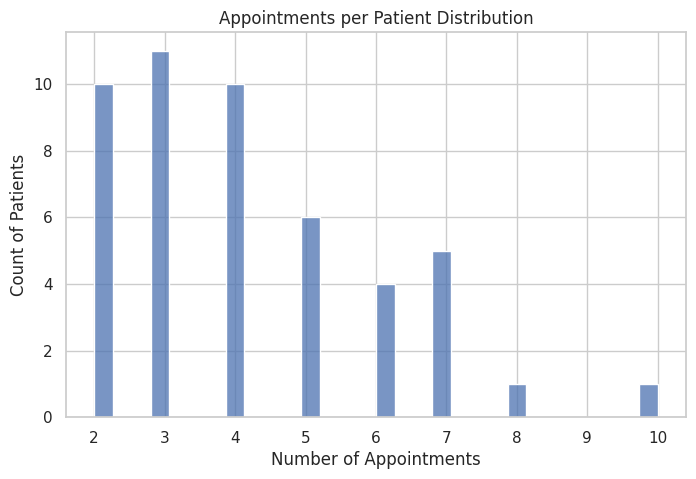

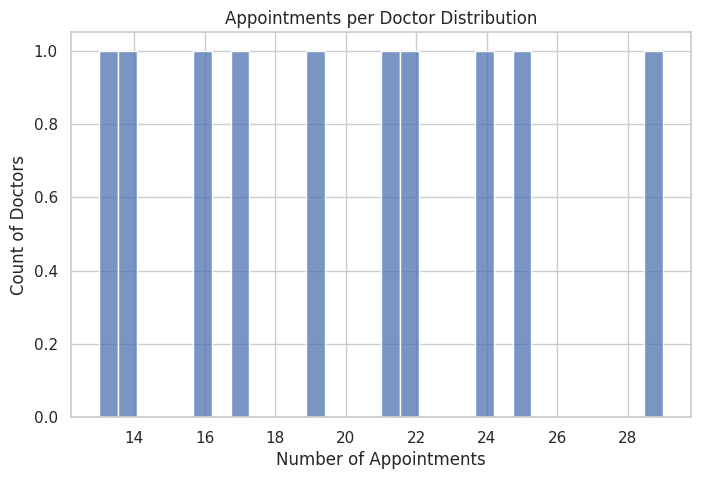

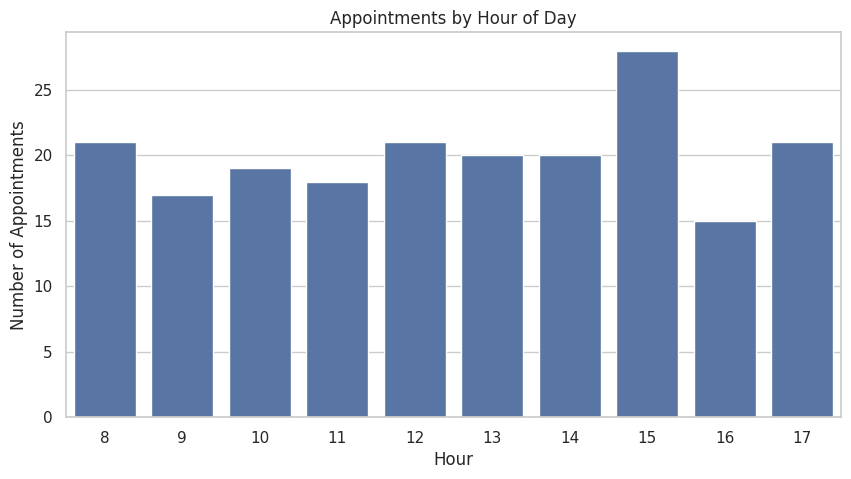

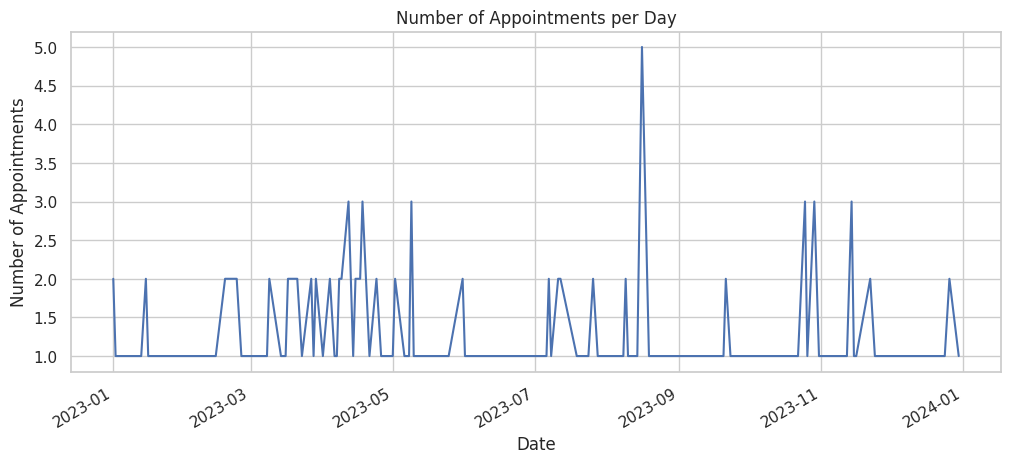

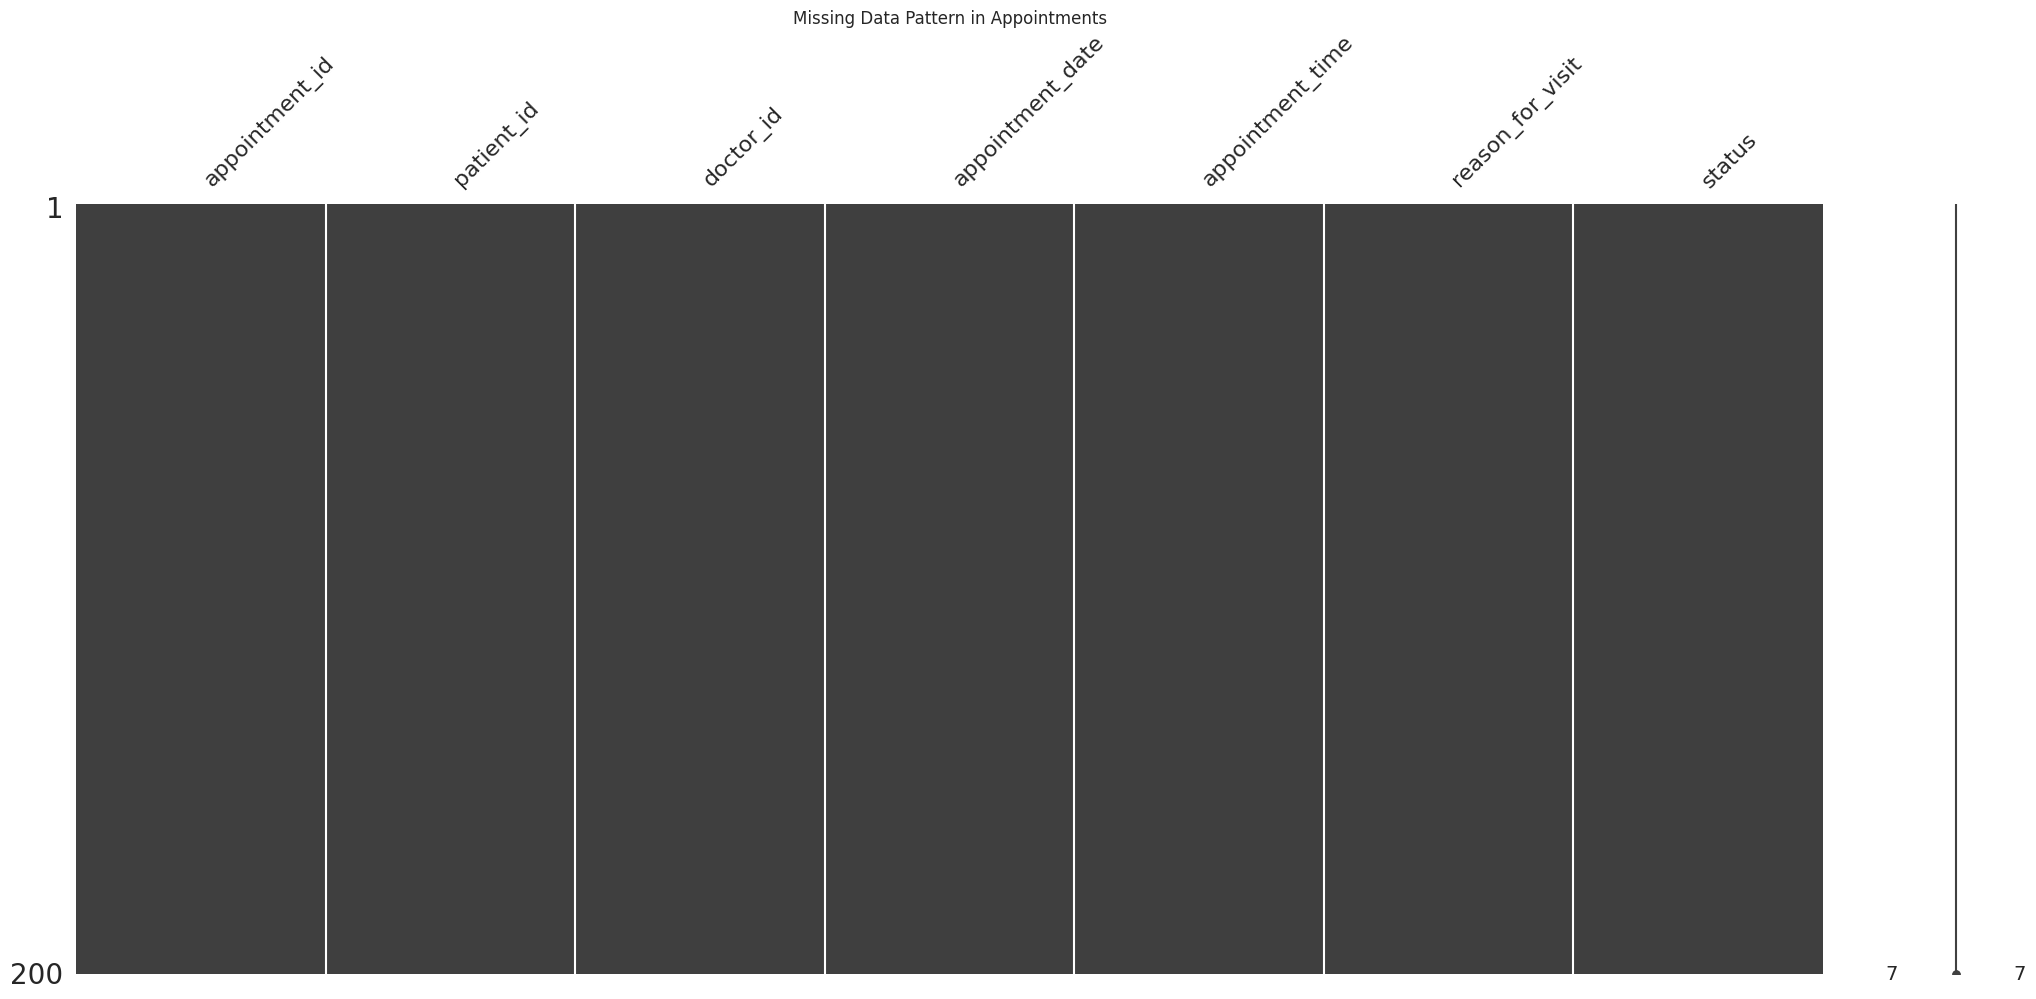

In [ ]:
# ----------- APPOINTMENTS -----------
print("\n----- APPOINTMENTS -----")
print(f"Shape: {appointments.shape}")
print(appointments.info())
print(appointments.describe(include='all'))

# Appointment status counts
print("\nAppointment Status Counts:")
print(appointments['status'].value_counts())

# Reason for visit counts
print("\nTop Reasons for Visit:")
print(appointments['reason_for_visit'].value_counts().head(10))

# Appointments per patient (distribution)
appts_per_patient = appointments['patient_id'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(appts_per_patient, bins=30, kde=False)
plt.title('Appointments per Patient Distribution')
plt.xlabel('Number of Appointments')
plt.ylabel('Count of Patients')
plt.show()

# Appointments per doctor (distribution)
appts_per_doctor = appointments['doctor_id'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(appts_per_doctor, bins=30, kde=False)
plt.title('Appointments per Doctor Distribution')
plt.xlabel('Number of Appointments')
plt.ylabel('Count of Doctors')
plt.show()

# Time of appointments analysis
appointments['appointment_time'] = pd.to_datetime(appointments['appointment_time'], format='%H:%M:%S', errors='coerce').dt.hour

plt.figure(figsize=(10,5))
sns.countplot(x='appointment_time', data=appointments)
plt.title('Appointments by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Number of Appointments')
plt.show()

# Appointments over time (optional - if appointment_date is date type)
appointments['appointment_date'] = pd.to_datetime(appointments['appointment_date'], errors='coerce')
appts_per_day = appointments.groupby('appointment_date').size()
plt.figure(figsize=(12,5))
appts_per_day.plot()
plt.title('Number of Appointments per Day')
plt.xlabel('Date')
plt.ylabel('Number of Appointments')
plt.show()

msno.matrix(appointments)
plt.title("Missing Data Pattern in Appointments")
plt.show()


----- TREATMENTS -----
Shape: (200, 6)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   treatment_id    200 non-null    object 
 1   appointment_id  200 non-null    object 
 2   treatment_type  200 non-null    object 
 3   description     200 non-null    object 
 4   cost            200 non-null    float64
 5   treatment_date  200 non-null    object 
dtypes: float64(1), object(5)
memory usage: 9.5+ KB
None
       treatment_id appointment_id treatment_type         description  \
count           200            200            200                 200   
unique          200            200              5                   3   
top            T001           A001   Chemotherapy  Standard procedure   
freq              1              1             49                  77   
mean            NaN            NaN            NaN                 NaN   
s

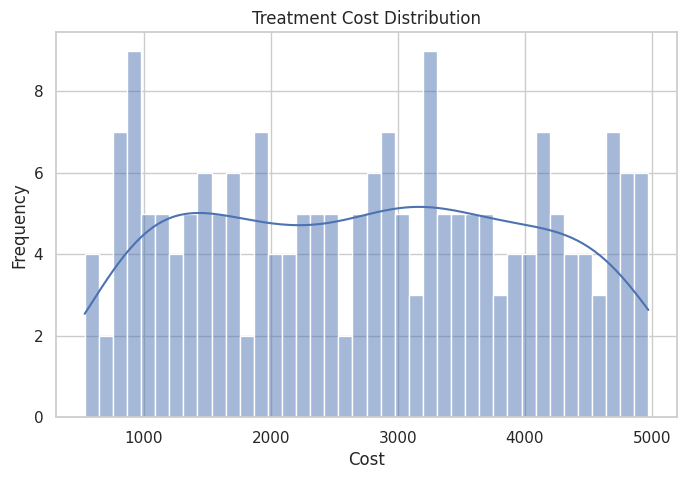

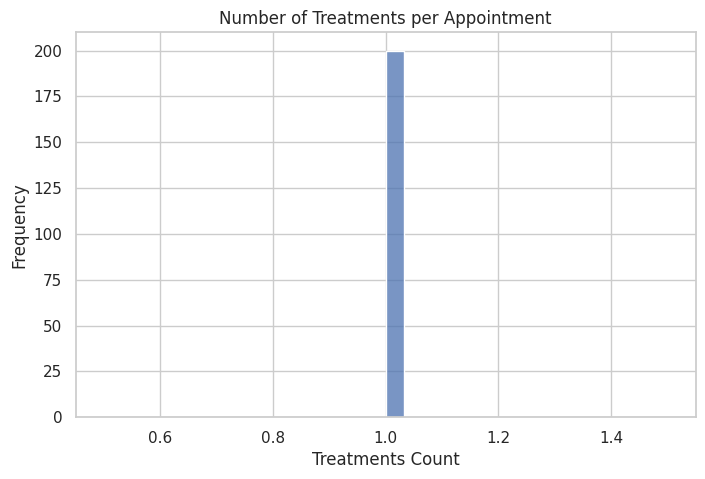

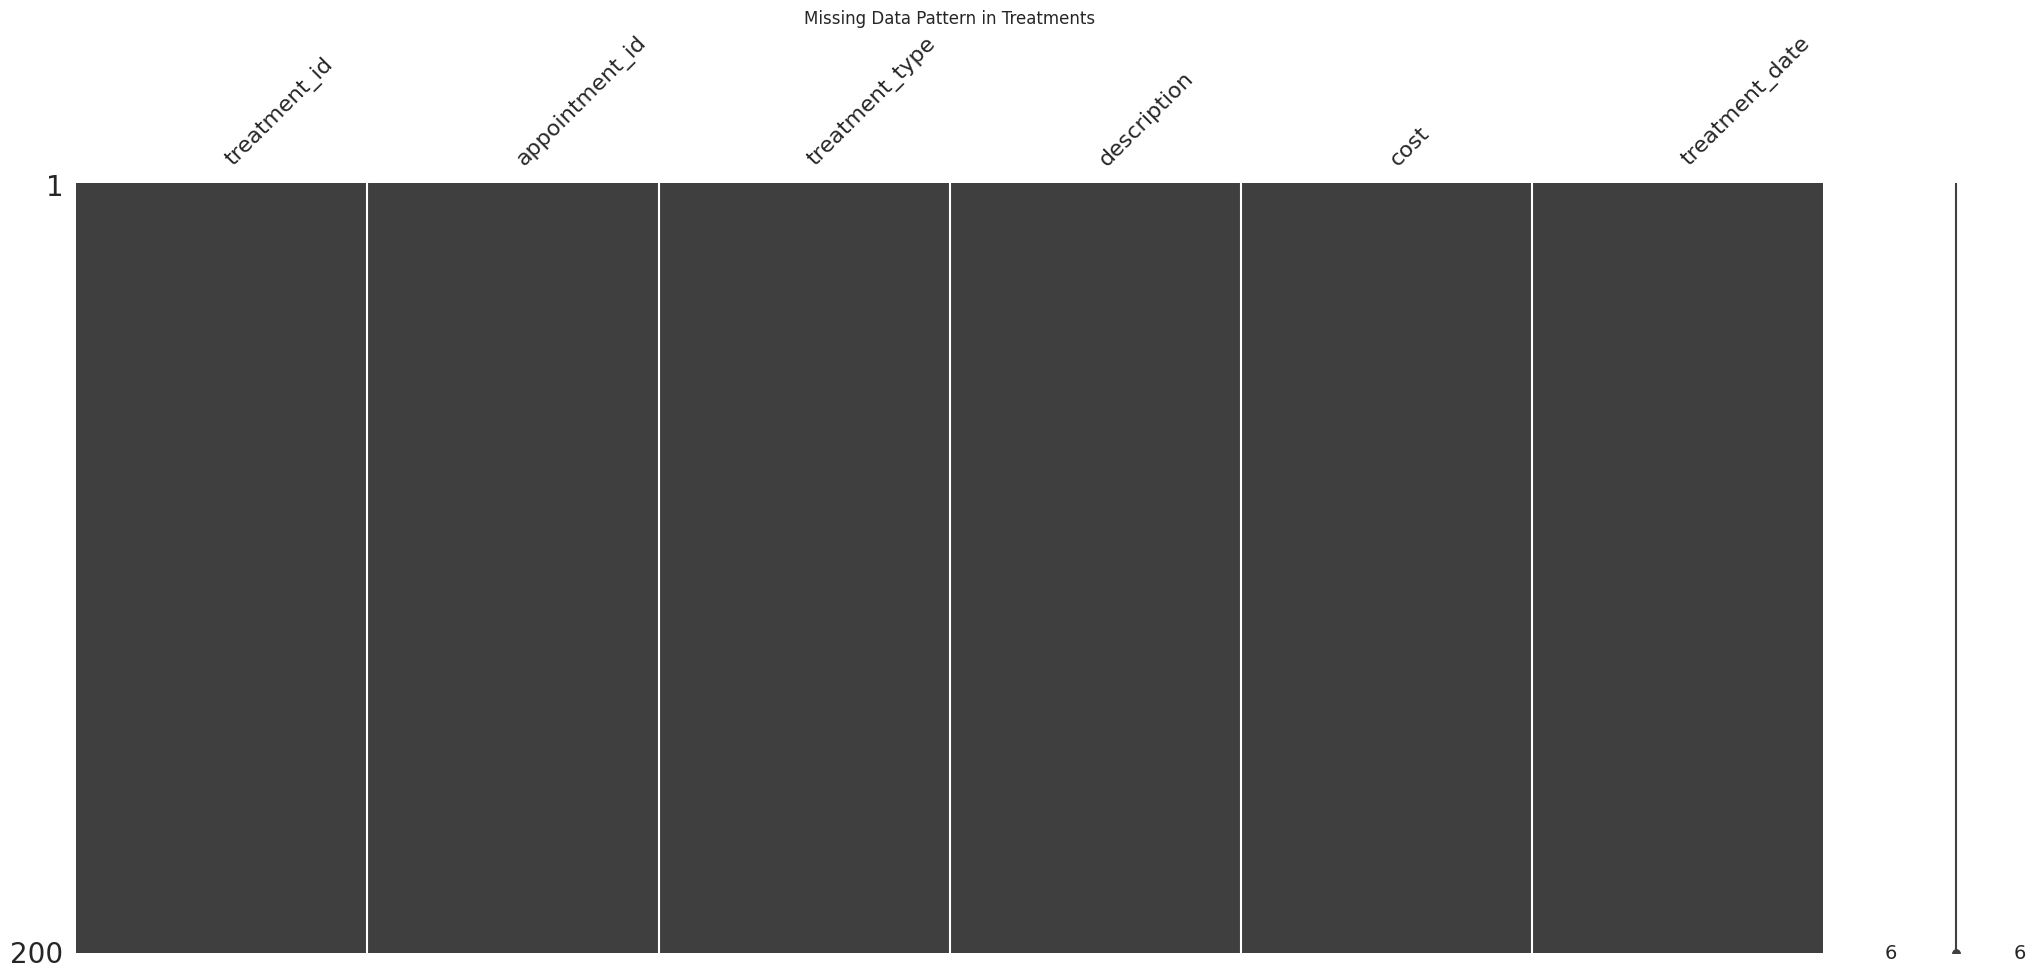

In [ ]:
# ----------- TREATMENTS -----------
print("\n----- TREATMENTS -----")
print(f"Shape: {treatments.shape}")
print(treatments.info())
print(treatments.describe(include='all'))

# Treatment type counts
print("\nTop Treatment Types:")
print(treatments['treatment_type'].value_counts().head(10))

# Cost distribution
plt.figure(figsize=(8,5))
sns.histplot(treatments['cost'].dropna(), bins=40, kde=True)
plt.title('Treatment Cost Distribution')
plt.xlabel('Cost')
plt.ylabel('Frequency')
plt.show()

# Check for treatments per appointment
treatments_per_appointment = treatments['appointment_id'].value_counts()
plt.figure(figsize=(8,5))
sns.histplot(treatments_per_appointment, bins=30)
plt.title('Number of Treatments per Appointment')
plt.xlabel('Treatments Count')
plt.ylabel('Frequency')
plt.show()

msno.matrix(treatments)
plt.title("Missing Data Pattern in Treatments")
plt.show()


----- BILLING -----
Shape: (200, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   bill_id         200 non-null    object 
 1   patient_id      200 non-null    object 
 2   treatment_id    200 non-null    object 
 3   bill_date       200 non-null    object 
 4   amount          200 non-null    float64
 5   payment_method  200 non-null    object 
 6   payment_status  200 non-null    object 
dtypes: float64(1), object(6)
memory usage: 11.1+ KB
None
       bill_id patient_id treatment_id   bill_date       amount  \
count      200        200          200         200   200.000000   
unique     200         48          200         158          NaN   
top       B001       P012         T001  2023-08-16          NaN   
freq         1         10            1           5          NaN   
mean       NaN        NaN          NaN         NaN  2756.2492

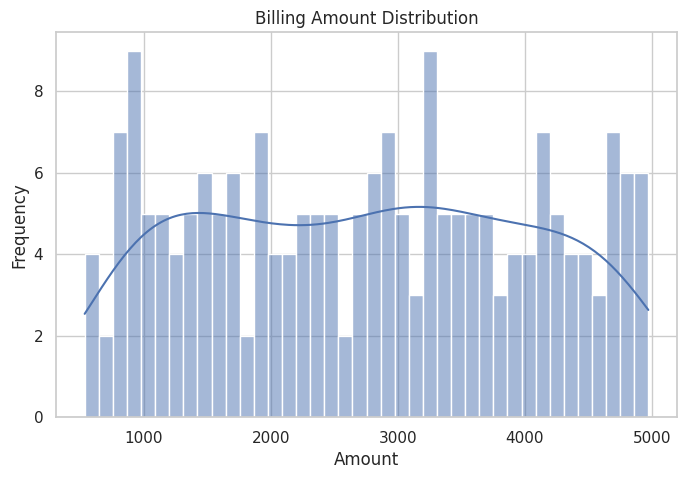

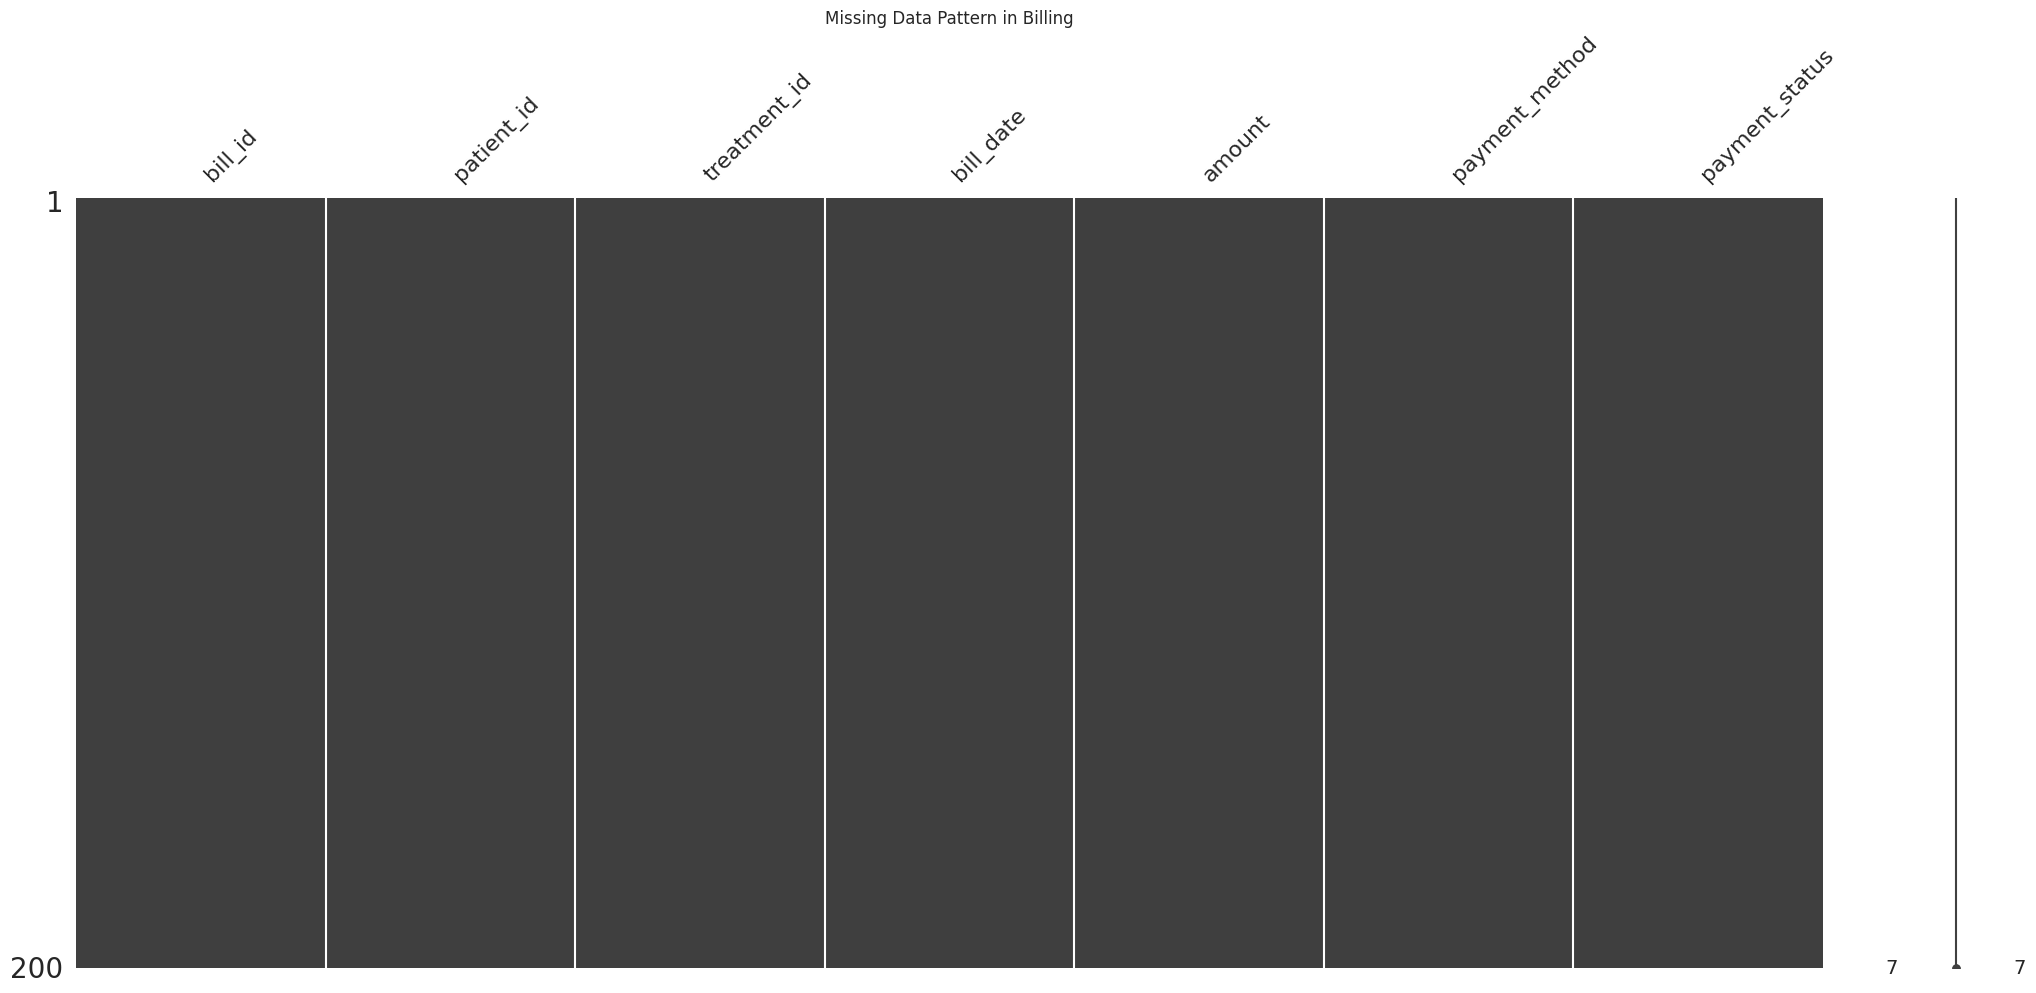

In [ ]:
# ----------- BILLING -----------
print("\n----- BILLING -----")
print(f"Shape: {billing.shape}")
print(billing.info())
print(billing.describe(include='all'))

# Payment method distribution
print("\nPayment Method Counts:")
print(billing['payment_method'].value_counts())

# Payment status distribution
print("\nPayment Status Counts:")
print(billing['payment_status'].value_counts())

# Amount billed distribution
plt.figure(figsize=(8,5))
sns.histplot(billing['amount'].dropna(), bins=40, kde=True)
plt.title('Billing Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.show()

# Missing data visualization
msno.matrix(billing)
plt.title("Missing Data Pattern in Billing")
plt.show()

In [ ]:
# ----------- CROSS-TABLE EXAMPLES -----------

print("\n----- CROSS-TABLE EXPLORATION -----")

# Merge appointments with patients to check repeat visits
appt_patient = appointments.merge(patients[['patient_id', 'gender', 'age']], on='patient_id', how='left')
print(f"Appointments merged with patients shape: {appt_patient.shape}")

# Average appointments per gender
print("\nAverage Appointments per Gender:")
print(appt_patient.groupby('gender')['appointment_id'].count())

# Merge treatments and billing to check consistency
treat_bill = treatments.merge(billing[['treatment_id', 'amount', 'payment_status']], on='treatment_id', how='left')
print(f"Treatments merged with billing shape: {treat_bill.shape}")

# Treatments with missing billing
missing_billing = treat_bill[treat_bill['amount'].isna()]
print(f"Number of treatments without billing: {missing_billing.shape[0]}")


----- CROSS-TABLE EXPLORATION -----
Appointments merged with patients shape: (200, 9)

Average Appointments per Gender:
gender
F     70
M    130
Name: appointment_id, dtype: int64
Treatments merged with billing shape: (200, 8)
Number of treatments without billing: 0


Following the initial exploratory data analysis (EDA), this project will focus on three main components:

**ETL & Data Warehouse Design**

As the dataset is clean (no missing or inconsistent values), we will skip deep data cleaning.

The goal is to design an ETL pipeline that transforms raw data into a star schema format using Python and MySQL.

We will define appropriate fact and dimension tables to enable robust analytics and reporting.

Once the data is structured, we will perform SQL-based analysis and build interactive dashboards using Looker Studio.


**Machine Learning: Risk Prediction**

We will develop and evaluate multiple ML models to predict high-risk patients based on historical patterns (e.g., treatment history, frequency of visits, doctor specialization, etc.).

The models will be trained and validated in Python (using Scikit-learn or other libraries) to identify patterns indicating elevated healthcare risk.

**Operations Research: Resource Optimization**

We will formulate an optimization problem to improve operational efficiency.

The focus will be on scheduling, staffing, or treatment prioritization.

Techniques such as Dynamic Programming, Linear Programming, or Integer Programming will be explored based on feasibility and data suitability.

We're designing the dimensions and fact tables for our ETL process, focusing on what we plan to visualize later in Looker Studio.

The schema will support the following key business questions:

Which hospitals perform best (by number of appointments or total revenue)?

Which doctors are most in-demand or most profitable?

Which specializations (e.g., pediatrics, cardiology) are most active?

What age groups are served the most?

What are the top insurance providers (in terms of volume or revenue)?

What are the top-performing months and hours in terms of appointments or revenue?

The fact will be appointements and dimensions are patients, doctors, specialities, hospitals, insurrance companies, and date.

In [ ]:
# Create a directory to save the output files
output_dir = "data_warehouse"
import os
os.makedirs(output_dir, exist_ok=True)

# Merge the dataframes to create a single dataframe for ETL
df = appointments.merge(patients, on='patient_id', how='left')
df = df.merge(doctors, on='doctor_id', how='left')
df = df.merge(treatments, on='appointment_id', how='left')
df = df.merge(billing, on='treatment_id', how='left')

# Calculate patient age after merging
df['date_of_birth'] = pd.to_datetime(df['date_of_birth'], errors='coerce')
today = pd.to_datetime('today')
df['patient_age'] = (today - df['date_of_birth']).dt.days // 365

# Convert appointment_date and appointment_time to datetime objects
df['appointment_date'] = pd.to_datetime(df['appointment_date'])
df['appointment_time'] = pd.to_datetime(df['appointment_time'], format='%H:%M:%S', errors='coerce').dt.time


# Rename columns for clarity and consistency
df.rename(columns={
    'gender': 'patient_gender',
    'specialization': 'speciality',
    'first_name_x': 'patient_first_name', # from patients df
    'last_name_x': 'patient_last_name',   # from patients df
    'first_name_y': 'doctor_first_name', # from doctors df
    'last_name_y': 'doctor_last_name',   # from doctors df
    'hospital_branch': 'hospital_name',
    'insurance_provider': 'insurance_company',
    'amount': 'appointment_fee'
}, inplace=True)

df['doctor_name'] = df['doctor_first_name'] + ' ' + df['doctor_last_name']

### 1. DIMENSION TABLES
### ------------------------

# DIM_PATIENTS
dim_patients = df[['patient_id_x', 'patient_first_name', 'patient_last_name', 'patient_gender', 'patient_age']].drop_duplicates().copy()
dim_patients.columns = ['patient_id', 'first_name', 'last_name', 'gender', 'age']
dim_patients.to_csv(f"{output_dir}/dim_patients.csv", index=False)

# DIM_SPECIALITIES
dim_specialities = df[['speciality']].drop_duplicates().reset_index(drop=True)
dim_specialities['speciality_id'] = dim_specialities.index + 1
dim_specialities = dim_specialities[['speciality_id', 'speciality']]
dim_specialities.to_csv(f"{output_dir}/dim_specialities.csv", index=False)

# DIM_HOSPITALS
dim_hospitals = df[['hospital_name']].drop_duplicates().reset_index(drop=True)
dim_hospitals['hospital_id'] = dim_hospitals.index + 1
dim_hospitals = dim_hospitals[['hospital_id', 'hospital_name']]
dim_hospitals.to_csv(f"{output_dir}/dim_hospitals.csv", index=False)

# DIM_DOCTORS
dim_doctors = doctors[['doctor_id', 'first_name', 'last_name', 'specialization', 'hospital_branch']].copy()
dim_doctors['doctor_name'] = dim_doctors['first_name'] + ' ' + dim_doctors['last_name']
dim_doctors.rename(columns={'specialization': 'speciality', 'hospital_branch': 'hospital_name'}, inplace=True)
dim_doctors = dim_doctors[['doctor_id', 'doctor_name', 'speciality', 'hospital_name']].drop_duplicates().copy()

# Merge to assign speciality_id and hospital_id to doctors
dim_doctors = dim_doctors.merge(dim_specialities, on='speciality', how='left')
dim_doctors = dim_doctors.merge(dim_hospitals, on='hospital_name', how='left')
dim_doctors = dim_doctors[['doctor_id', 'doctor_name', 'speciality_id', 'hospital_id']]
dim_doctors.to_csv(f"{output_dir}/dim_doctors.csv", index=False)


# DIM_INSURANCE
dim_insurance = df[['insurance_company']].drop_duplicates().reset_index(drop=True)
dim_insurance['insurance_id'] = dim_insurance.index + 1
dim_insurance = dim_insurance[['insurance_id', 'insurance_company']]
dim_insurance.to_csv(f"{output_dir}/dim_insurance.csv", index=False)


# DIM_DATE
dim_date = df[['appointment_date', 'appointment_time']].drop_duplicates().copy()
dim_date['date_id'] = dim_date['appointment_date'].dt.strftime('%Y%m%d').astype(int)
dim_date['year'] = dim_date['appointment_date'].dt.year
dim_date['month'] = dim_date['appointment_date'].dt.month
dim_date['day'] = dim_date['appointment_date'].dt.day
dim_date['weekday'] = dim_date['appointment_date'].dt.day_name()
dim_date['hour'] = pd.to_datetime(dim_date['appointment_time'], format='%H:%M:%S', errors='coerce').dt.hour
dim_date = dim_date[['date_id', 'appointment_date', 'year', 'month', 'day', 'weekday', 'hour']]
dim_date.to_csv(f"{output_dir}/dim_date.csv", index=False)

### ------------------------
### 2. FACT TABLE
### ------------------------

# Add date_id and other dimension keys to the main dataframe
df = df.merge(dim_date[['appointment_date', 'date_id']], on='appointment_date', how='left')
df = df.merge(dim_doctors[['doctor_id', 'hospital_id', 'speciality_id']], on='doctor_id', how='left')
df = df.merge(dim_insurance[['insurance_company', 'insurance_id']], on='insurance_company', how='left')

fact_appointments = df[['appointment_id', 'patient_id_x', 'doctor_id', 'hospital_id',
                        'insurance_id', 'date_id', 'appointment_fee', 'payment_status', 'status']].copy()

fact_appointments.rename(columns={'patient_id_x': 'patient_id'}, inplace=True)

fact_appointments.to_csv(f"{output_dir}/fact_appointments.csv", index=False)

In [ ]:
import shutil
from IPython.display import FileLink, display
import os
from google.colab import files

# Define the CSV directory
output_dir = "data_warehouse"

# List all CSVs
csv_files = [f for f in os.listdir(output_dir) if f.endswith('.csv')]

# Download each file
for csv_file in csv_files:
    file_path = os.path.join(output_dir, csv_file)
    files.download(file_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Now after the files are downloaded further operations will take place in Looker.
However in this notebook we will focus later on the aspect related to ML and risky clients.


In [ ]:
# Merge the dataframes step-by-step
merged_df = appointments.merge(patients, on='patient_id', how='left')
merged_df = merged_df.merge(treatments, on='appointment_id', how='left')
merged_df = merged_df.merge(billing, on='treatment_id', how='left')

# Display the first few rows of the merged dataframe
display(merged_df.head())

,appointment_id,patient_id_x,doctor_id,appointment_date,appointment_time,reason_for_visit,status,first_name,last_name,gender,...,treatment_type,description,cost,treatment_date,bill_id,patient_id_y,bill_date,amount,payment_method,payment_status
0,A001,P034,D009,2023-08-09,15:15:00,Therapy,Scheduled,Alex,Smith,F,...,Chemotherapy,Basic screening,3941.97,2023-08-09,B001,P034,2023-08-09,3941.97,Insurance,Pending
1,A002,P032,D004,2023-06-09,14:30:00,Therapy,No-show,Alex,Moore,M,...,MRI,Advanced protocol,4158.44,2023-06-09,B002,P032,2023-06-09,4158.44,Insurance,Paid
2,A003,P048,D004,2023-06-28,8:00:00,Consultation,Cancelled,Emily,Miller,M,...,MRI,Standard procedure,3731.55,2023-06-28,B003,P048,2023-06-28,3731.55,Insurance,Paid
3,A004,P025,D006,2023-09-01,9:15:00,Consultation,Cancelled,Robert,Wilson,M,...,MRI,Basic screening,4799.86,2023-09-01,B004,P025,2023-09-01,4799.86,Insurance,Failed
4,A005,P040,D003,2023-07-06,12:45:00,Emergency,No-show,Emily,Williams,M,...,ECG,Standard procedure,582.05,2023-07-06,B005,P040,2023-07-06,582.05,Credit Card,Pending


## Feature Engineering

In [ ]:
# Feature Engineering

# Calculate patient age
merged_df['date_of_birth'] = pd.to_datetime(merged_df['date_of_birth'], errors='coerce')
today = pd.to_datetime('today')
merged_df['patient_age'] = (today - merged_df['date_of_birth']).dt.days // 365

# Calculate patient-level features
patient_features = merged_df.groupby('patient_id_x').agg(
    appointment_count=('appointment_id', 'count'),
    no_show_count=('status', lambda x: (x == 'No-show').sum()),
    average_treatment_cost=('cost', 'mean'),
    total_billing_amount=('amount', 'sum'),
    failed_payment_count=('payment_status', lambda x: (x == 'Failed').sum()),
    pending_payment_count=('payment_status', lambda x: (x == 'Pending').sum())
).reset_index()

# Calculate no-show rate per patient
patient_features['no_show_rate'] = patient_features['no_show_count'] / patient_features['appointment_count']

# Add patient demographics (age and gender) to patient_features
patient_demographics = merged_df[['patient_id_x', 'patient_age', 'gender']].drop_duplicates()
patient_features = patient_features.merge(patient_demographics, on='patient_id_x', how='left')

# Select relevant features for the model
features = [
    'appointment_count',
    'no_show_rate',
    'average_treatment_cost',
    'total_billing_amount',
    'failed_payment_count',
    'pending_payment_count',
    'patient_age',
    'gender' # Use the original gender column
]

# Create the feature dataframe
X = patient_features[features].copy()

# Handle categorical features (gender)
X = pd.get_dummies(X, columns=['gender'], drop_first=True)

# Display the first few rows of the feature dataframe
display(X.head())

,appointment_count,no_show_rate,average_treatment_cost,total_billing_amount,failed_payment_count,pending_payment_count,patient_age,gender_M
0,4,0.25,1929.76750,7719.07,2,1,70,False
1,3,0.00,1989.58000,5968.74,1,1,40,False
2,2,0.00,3968.44000,7936.88,0,1,47,True
3,2,0.00,2681.25500,5362.51,1,1,44,False
4,8,0.50,2326.23875,18609.91,4,2,65,True


## Target Variable Definition

In [ ]:
# Target Variable Definition

# Redefine 'risky' clients:
# A client is considered 'risky' if they have at least one 'Failed' payment.
# Clients with only 'Pending' or 'Paid' payments are considered 'not risky'.
risky_patients_failed_payments = merged_df[(merged_df['payment_status'] == 'Failed')]['patient_id_x'].unique()

# Create the target variable: 1 for risky (at least one failed payment), 0 otherwise
y = patient_features['patient_id_x'].apply(lambda x: 1 if x in risky_patients_failed_payments else 0)

# Display the value counts of the target variable
display(y.value_counts())

,count
patient_id_x,
1,40
0,8


## Data Splitting

In [ ]:
# Data Splitting
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (33, 8)
Shape of X_test: (15, 8)
Shape of y_train: (33,)
Shape of y_test: (15,)


## Model Training and Evaluation

In [ ]:
# Model Training and Evaluation
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'ANN': MLPClassifier(random_state=42, max_iter=1000)
}

# Dictionary to store results
results = {}

# Check the number of classes in the training data
num_classes = len(np.unique(y_train))

if num_classes < 2:
    print(f"Skipping model training: Training data contains only {num_classes} class(es). Need at least 2 classes for classification models.")
    # You may need to redefine your target variable or collect more data to have both classes.
else:
    # Train and evaluate each model
    for name, model in models.items():
        print(f"Training {name}...")
        try:
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)
            y_prob = model.predict_proba(X_test)[:, 1] # Probability for the positive class

            # Calculate metrics
            accuracy = accuracy_score(y_test, y_pred)
            cm = confusion_matrix(y_test, y_pred)
            tn, fp, fn, tp = cm.ravel()

            # Calculate sensitivity and specificity
            sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
            specificity = tn / (tn + fp) if (tn + fp) > 0 else 0


            # Calculate ROC curve and AUC
            fpr, tpr, thresholds = roc_curve(y_test, y_prob)
            roc_auc = auc(fpr, tpr)

            results[name] = {
                'accuracy': accuracy,
                'sensitivity': sensitivity,
                'specificity': specificity,
                'roc_curve': (fpr, tpr),
                'roc_auc': roc_auc
            }

            print(f"{name} - Accuracy: {accuracy:.4f}, Sensitivity: {sensitivity:.4f}, Specificity: {specificity:.4f}, AUC: {roc_auc:.4f}")
        except ValueError as e:
            print(f"Could not train {name}: {e}")

Training Logistic Regression...
Logistic Regression - Accuracy: 0.9333, Sensitivity: 1.0000, Specificity: 0.6667, AUC: 0.7500
Training Random Forest...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Random Forest - Accuracy: 0.9333, Sensitivity: 1.0000, Specificity: 0.6667, AUC: 1.0000
Training KNN...
KNN - Accuracy: 0.8000, Sensitivity: 1.0000, Specificity: 0.0000, AUC: 0.6806
Training ANN...
ANN - Accuracy: 0.8000, Sensitivity: 1.0000, Specificity: 0.0000, AUC: 0.5000


## Model Comparison (ROC Curves)

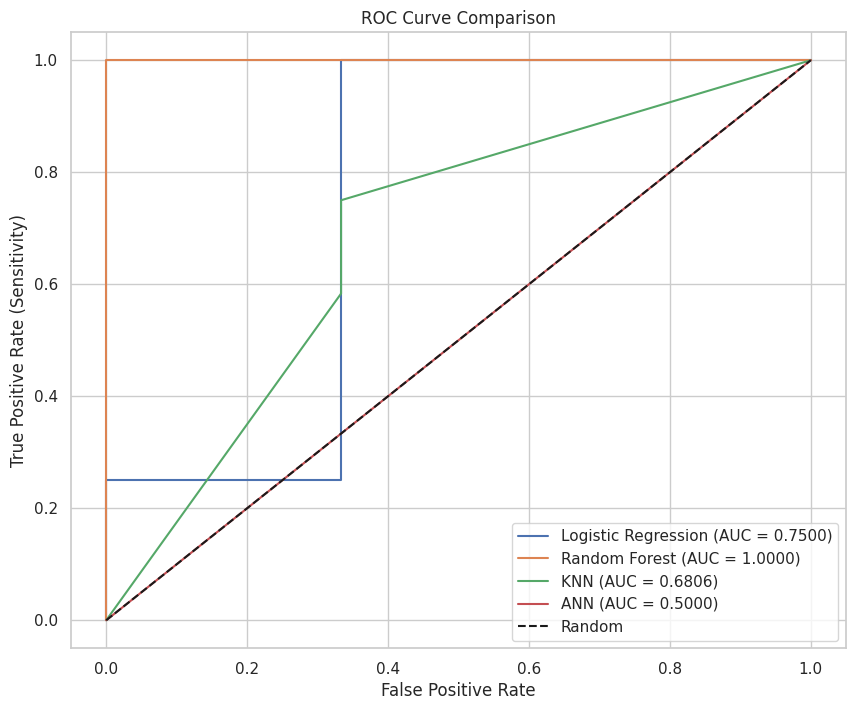

In [ ]:
# Model Comparison (ROC Curves)

plt.figure(figsize=(10, 8))

for name, res in results.items():
    plt.plot(res['roc_curve'][0], res['roc_curve'][1], label=f'{name} (AUC = {res["roc_auc"]:.4f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

## Model Comparison (Metrics)

In [ ]:
# Model Comparison (Metrics)

import pandas as pd

metrics_df = pd.DataFrame({name: {
    'Accuracy': res['accuracy'],
    'Sensitivity': res['sensitivity'],
    'Specificity': res['specificity'],
    'AUC': res['roc_auc']
} for name, res in results.items()}).T

display(metrics_df)

,Accuracy,Sensitivity,Specificity,AUC
Logistic Regression,0.933333,1.0,0.666667,0.750000
Random Forest,0.933333,1.0,0.666667,1.000000
KNN,0.800000,1.0,0.000000,0.680556
ANN,0.800000,1.0,0.000000,0.500000


To predict if the client is risky or not the best approach to opt for Random forest as it has high accuracy and also the highest AUC among all models.